#Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.cluster import KMeans

In [ ]:
df= pd.read_csv("/content/flight.csv")
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
explore = df.describe(percentiles = [], include = 'all').T 
# Obtain the number of null record
explore['null'] = len(df) - explore['count'] 
# Return the number of missing value, min and max
explore = explore[['null','min','max']] 

In [ ]:
explore

,null,min,max
MEMBER_NO,0.0,1.0,62988.0
FFP_DATE,0,NaN,NaN
FIRST_FLIGHT_DATE,0,NaN,NaN
GENDER,3,NaN,NaN
FFP_TIER,0.0,4.0,6.0
WORK_CITY,2269,NaN,NaN
WORK_PROVINCE,3248,NaN,NaN
WORK_COUNTRY,26,NaN,NaN
AGE,420.0,6.0,110.0
LOAD_TIME,0,NaN,NaN


#Data Preprocessing

##Cleaning data to filter unqualified data:

In [ ]:
# Keep instances that ticket price is not null 
clean = df[df['SUM_YR_1'].notnull() & df['SUM_YR_2'].notnull()] 
# Keep instances that ticket price is not 0  OR  average discount is not 0 (100% off)
index1 = clean['SUM_YR_1'] != 0
index2 = clean['SUM_YR_2'] != 0
index3 = clean['avg_discount'] != 0
clean = clean[index1 | index2 | index3] 

In [ ]:
clean.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


##Reducing features to select necessary factor for RFM model:

R: Recency

F: Frequency

M: Monetary

Except RFM, L and C are also important, which refer to Length of customer relationship and Average discount of ticket price

In [ ]:
reduce = clean[['LOAD_TIME', 'FFP_DATE', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
reduce.head()

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,3/31/2014,11/2/2006,1,210,580717,0.961639
1,3/31/2014,2/19/2007,7,140,293678,1.252314
2,3/31/2014,2/1/2007,11,135,283712,1.254676
3,3/31/2014,8/22/2008,97,23,281336,1.090870
4,3/31/2014,4/10/2009,5,152,309928,0.970658


Transforming data to obtain fit data:

L = LOAD_DATE - FFP_DATE

R = LAST_TO_END

F = FLIGHT_COUNT

M = SEG_KM_SUM

C = AVG_DISCOUNT

##Transforming data to obtain fit data:

In [ ]:
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'
reduce['LOAD_TIME'] = pd.to_datetime(reduce['LOAD_TIME'])
reduce['FFP_DATE'] = pd.to_datetime(reduce['FFP_DATE'])
reduce['L'] = reduce['LOAD_TIME'] - reduce['FFP_DATE']
reduce['L'] = reduce['L'].dt.days

In [ ]:
air_data = reduce[['L', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']]
air_data.columns = ['L','R','F','M','C']
air_datadrop = air_data

In [ ]:
air_datadrop.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [ ]:
air_data_summary = air_datadrop.describe(percentiles = [], include = 'all')
air_data_summary

,L,R,F,M,C
count,62292.000000,62292.000000,62292.000000,62292.000000,62292.000000
mean,1487.465036,172.775043,11.942192,17277.192015,0.721943
std,847.772856,181.271897,14.092072,21024.925275,0.184883
min,365.000000,1.000000,2.000000,368.000000,0.112043
50%,1276.000000,105.000000,7.000000,10165.000000,0.712013
max,3437.000000,731.000000,213.000000,580717.000000,1.500000


#coba

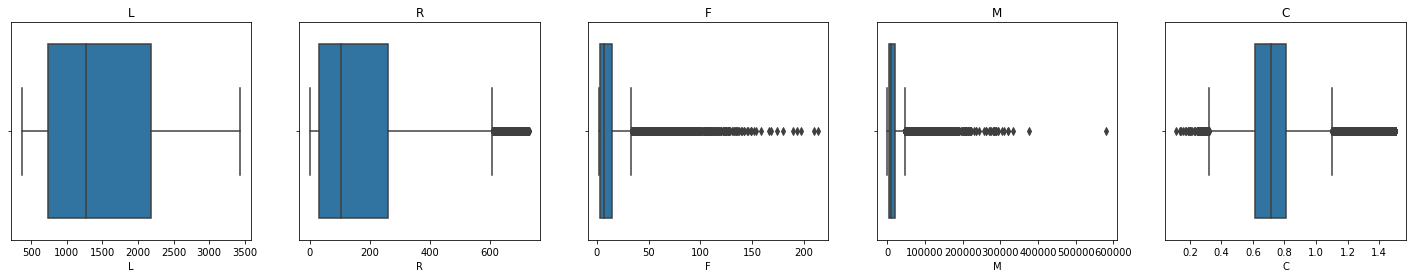

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(air_datadrop[col])
        plt.title(col)
        i = i+1     
dist_list(LRFM)

In [ ]:
rfm_log=air_datadrop.copy()

In [ ]:
cols=['R','F','M','C']
for col in cols:
    high_cut = rfm_log[col].quantile(q=0.99)
    low_cut=rfm_log[col].quantile(q=0.01)
    rfm_log.loc[rfm_log[col]>high_cut,col]=high_cut
    rfm_log.loc[rfm_log[col]<low_cut,col]=low_cut

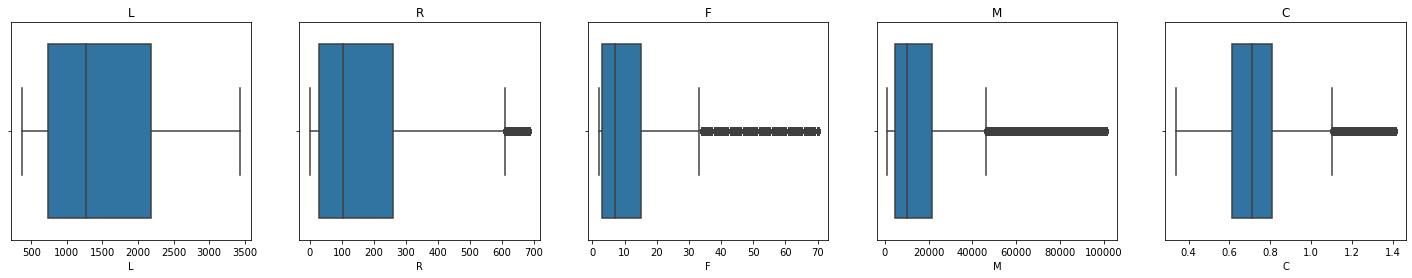

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(rfm_log[col])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [ ]:
rfm_log.shape

(62292, 5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_std=rfm_log
scale = MinMaxScaler()
kolom_all = [x for x in df_std.columns]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))
  
df_std.head()

,L,R,F,M,C
0,0.762044,0.000000,1.000000,1.0,0.581496
1,0.726562,0.008772,1.000000,1.0,0.852815
2,0.732422,0.014620,1.000000,1.0,0.855019
3,0.547526,0.140351,0.308824,1.0,0.702121
4,0.472331,0.005848,1.000000,1.0,0.589915


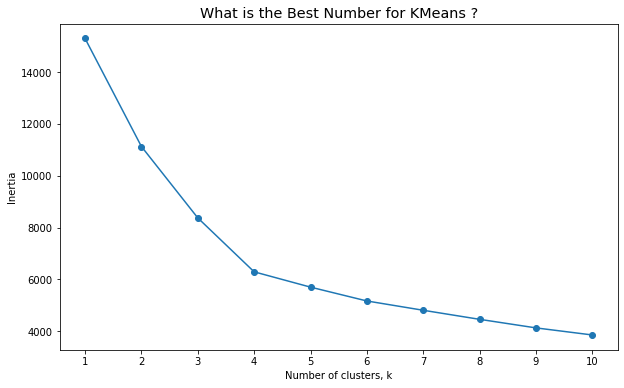

In [ ]:
from sklearn.cluster import KMeans
ks = range(1,11)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(df_std)
    cluster = kc.fit_predict(df_std)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [ ]:
#Silhoutte to get best number for K Means

from sklearn.metrics import silhouette_score
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(df_std)
    preds = clusterer.predict(df_std)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_std, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.1862993658152767
For n_clusters = 3. The average silhouette_score is : 0.21410098679562342
For n_clusters = 4. The average silhouette_score is : 0.23625724568523063
For n_clusters = 5. The average silhouette_score is : 0.21134438823330423


In [ ]:
kc = KMeans(init='k-means++',n_clusters= 4, random_state=142)
kc.fit(df_std)
cluster_labels = kc.labels_

data_c = df_std.assign(K_Cluster = cluster_labels)
data_label=air_data.assign(K_Cluster = cluster_labels)
data_f=data_c.groupby('K_Cluster').mean()
data_f['count']=pd.value_counts(data_c['K_Cluster'])
data_f

,L,R,F,M,C,count
K_Cluster,,,,,,
0,0.686656,0.164259,0.117112,0.129725,0.364775,16970
1,0.271427,0.694836,0.029091,0.049880,0.353248,12598
2,0.502547,0.040436,0.596842,0.599709,0.419134,6081
3,0.173878,0.144084,0.110227,0.123835,0.341442,26643


CPU times: user 2.03 s, sys: 1.02 s, total: 3.05 s
Wall time: 1.59 s


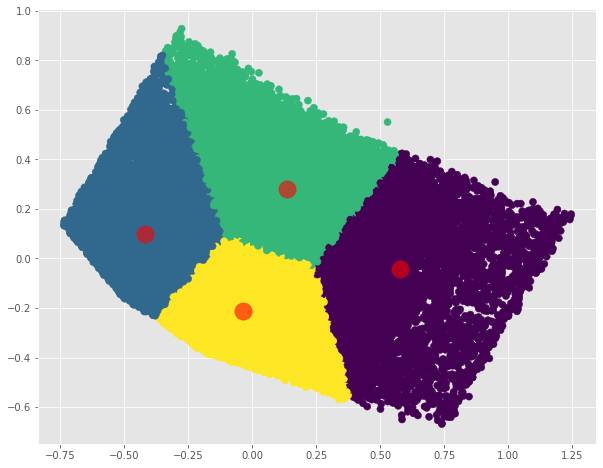

In [ ]:
x=data_c.drop('K_Cluster', axis=1)
#kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_std)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=150, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=air_data.assign(K_Cluster = prediction)
targets = [0, 1, 2,3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

In [ ]:
data_labeling=air_data.assign(K_Cluster = cluster_labels)

In [ ]:
cluster = [] #membuat list kosong
for i, k in data_labeling.iterrows(): #iterasi setiap row
    if k['K_Cluster'] == 0:
        cluster_name = 'Potential'
    elif k['K_Cluster'] == 3:
        cluster_name = 'Loyal'
    elif k['K_Cluster'] == 1:
        cluster_name = 'Important'
    else:
        cluster_name = 'Low Value'
    cluster.append(cluster_name)

In [ ]:
data_labeling['cluster'] = cluster #membuat kolom dari list
data_label['cluster'] = cluster #membuat kolom dari list
df_me=data_label.groupby(data_label['cluster']).mean()
df_me['count']=pd.value_counts(data_label['cluster'])
df_me

,L,R,F,M,C,K_Cluster,count
cluster,,,,,,,
Important,1198.824496,477.237498,3.978171,6207.068027,0.716867,1.0,12598
Low Value,1908.824207,28.657951,44.682947,64931.666338,0.788289,2.0,6081
Loyal,899.152836,99.553203,9.495440,13601.424764,0.704288,3.0,26643
Potential,2474.407307,113.352976,9.963583,14189.863229,0.729654,0.0,16970


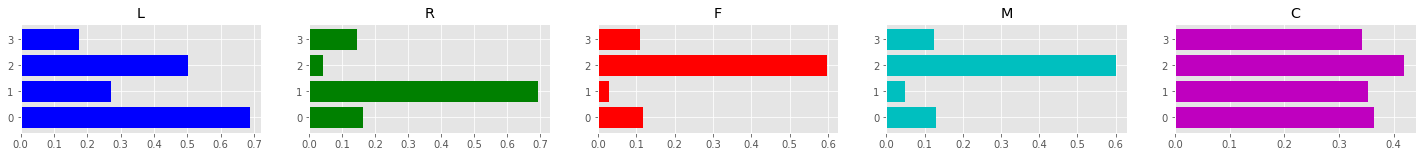

In [ ]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)


1. Golongan pertama, 16.970 orang, ciri terbesar orang jenis ini adalah lamanya waktu bergabung menjadi anggota, yang merupakan milik pelanggan lama, tetapi waktu penerbangan dan total mileage mereka tidak banyak, rata-rata tarif per kilometer dan tingkat diskon rata-rata tidak tinggi , Dan interval waktu penerbangan rata-rata tidak lama, menunjukkan bahwa pelanggan tersebut tidak terlalu aktif setelah bergabung dengan maskapai. Mereka mungkin telah mengambil beberapa penerbangan dan tidak menggunakan pesawat maskapai lagi. Mereka dianggap sebagai pelanggan yang hilang. Anda harus mencoba untuk memahami informasi terbaru dari pelanggan ini, mempertahankan interaksi dengan pelanggan, dan mengadopsi metode pemasaran tertentu seperti tindakan preferensial dan penjualan silang untuk memulihkan pelanggan tersebut.

2. Kelompok orang kedua, 12698 orang, fitur terbesar adalah interval waktu penerbangan rata-rata panjang, jumlah penerbangan dan total mileage kecil, tarif rata-rata per kilometer dan tingkat diskonto rata-rata tidak tinggi, dan waktu keanggotaan juga lebih pendek, pengguna tersebut Biasanya konsumsi sesekali, yang mungkin karena alasan musiman atau terkait dengan kegiatan promosi. Untuk pengguna seperti itu, perlu untuk mempertahankan dan merangsang konsumsi sebanyak mungkin.

3. Kelompok orang ketiga, 6081 orang, fitur terbesar adalah bahwa rata-rata tarif per kilometer dan tingkat diskon rata-rata adalah yang tertinggi, jumlah penerbangan, total mileage, dan waktu keanggotaan lebih sedikit. Jenis pelanggan ini adalah pelanggan bernilai tinggi, umumnya pelanggan kelas atas Personel bisnis di kabin adalah kunci untuk mempertahankan dan mengembangkan, dan dapat mengadopsi kebijakan preferensial yang relevan seperti langkah peningkatan anggota untuk meningkatkan jumlah perjalanan mereka.

4. Cluster keempat, 26.643 orang, memiliki data rendah di semua aspek dan termasuk pengguna bernilai rendah. Untuk pengguna ini, mereka harus dipertahankan sebanyak mungkin, dan kemudian merangsang konsumsi mereka untuk merangsang vitalitas konsumsi mereka.